# Project 2 - Legacy Landmark Inc Portfolio Diversification

![Home and keys image](home-pic.jpg) 

## Problem Statement

**Business Context**: 

In light of the volatile commercial real estate market conditions and  diminishing values in commercial real estate holdings, Legacy Landmark Inc is exploring avenues to diversify its portfolio and mitigate further losses. Recognizing the opportunity in the residential real estate sector, Legacy Landmark wants to add residential holdings to their portfolio. They will use the Ames Iowa dataset as a sample of the state population and use it to make inferences for the state residential real estate market. 

As a Legacy Landmark Inc data scientist, you are to analyze local real estate market data as a sample of the state sale price population and make inferences to determine what kind of properties will hold the highest resale values. 

### Import important libraries

### **Data Dictionary**:

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**SalePrice**|*int*|Ames Iowa Housing| Sale price $$|
|**Overall Qual**|*int*|Ames Iowa Housing| Rates the overall material and finish of the house
|**Gr Liv Area**|*int*|Ames Iowa Housing|Above grade (ground) living area square feet|
|**Garage Cars**|*float*|Ames Iowa Housing|Size of garage in car capacity|
|**Total Bsmt SF**|*float*|Ames Iowa Housing|Total square feet of basement area|
|**1st Flr SF**|*int*|Ames Iowa Housing|First Floor square feet|
|**Year Built**|*int*|Ames Iowa Housing|Original construction date|
|**Year Remod/Add**|*int*|Ames Iowa Housing|Remodel date (same as construction date if no remodeling or additions)|
|**Full Bath**|*int*|Ames Iowa Housing|Full bathrooms above grade|
|**Mas Vnr Area**|*float*|Ames Iowa Housing|Masonry veneer area in square feet|
|**TotRms AbvGrd**|*int*|Ames Iowa Housing|Total rooms above grade (does not include bathrooms)|

### Important Libraries

In [801]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libraries to help with data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# to build linear regression_model
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV, ElasticNet, ElasticNetCV


from sklearn.ensemble import RandomForestRegressor

# to split the data into train and test
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

# preprocessing
# not sure which I'll use yet
from sklearn.preprocessing import  StandardScaler


# not sure if I'll use this, but we'll see
import sklearn
sklearn.set_config(display='diagram')

# to check model performance
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Library to suppress warnings or deprecation notes
import warnings

warnings.filterwarnings("ignore")

### Load datasets

In [802]:
train = pd.read_csv('datasets/train.csv')
test = pd.read_csv('datasets/test.csv')

### Data Overview Train Data
- Observations
- Sanity checks

In [803]:
train.sample(5)

,Unnamed: 0,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
1005,1081,1052,528102110,60,RL,96.0,12474,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,8,2008,New,426000
666,434,1465,907262060,60,RL,41.0,10905,Pave,NaN,IR2,...,0,0,NaN,NaN,NaN,0,8,2008,WD,240000
637,125,1183,533350090,60,RL,NaN,24572,Pave,NaN,IR1,...,0,0,NaN,NaN,NaN,0,6,2008,WD,150000
1197,1779,400,527405180,20,RL,70.0,8120,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,7,2009,WD,124500
833,491,1493,908128050,85,RL,90.0,10012,Pave,NaN,Reg,...,0,0,NaN,MnPrv,NaN,0,4,2008,WD,137500


In [804]:
train.dtypes

Unnamed: 0      int64
Id              int64
PID             int64
MS SubClass     int64
MS Zoning      object
                ...  
Misc Val        int64
Mo Sold         int64
Yr Sold         int64
Sale Type      object
SalePrice       int64
Length: 82, dtype: object

In [805]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1538 entries, 0 to 1537
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       1538 non-null   int64  
 1   Id               1538 non-null   int64  
 2   PID              1538 non-null   int64  
 3   MS SubClass      1538 non-null   int64  
 4   MS Zoning        1538 non-null   object 
 5   Lot Frontage     1285 non-null   float64
 6   Lot Area         1538 non-null   int64  
 7   Street           1538 non-null   object 
 8   Alley            111 non-null    object 
 9   Lot Shape        1538 non-null   object 
 10  Land Contour     1538 non-null   object 
 11  Utilities        1538 non-null   object 
 12  Lot Config       1538 non-null   object 
 13  Land Slope       1538 non-null   object 
 14  Neighborhood     1538 non-null   object 
 15  Condition 1      1538 non-null   object 
 16  Condition 2      1538 non-null   object 
 17  Bldg Type     

In [806]:
# checking shape of the data
print(f"There are {train.shape[0]} rows and {train.shape[1]} columns.")

There are 1538 rows and 82 columns.


In [807]:
train.describe()

,Unnamed: 0,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,1538.000000,1538.000000,1.538000e+03,1538.000000,1285.000000,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000,...,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000
mean,1024.970741,1469.562419,7.118700e+08,56.983095,69.378210,9955.676203,6.109883,5.559818,1971.860858,1984.168401,...,94.012354,47.527308,22.126138,2.618986,16.298440,2.569571,58.338101,6.177503,2007.776983,181061.993498
std,588.860047,840.814349,1.886513e+08,43.217246,24.095542,5427.477335,1.428502,1.100363,30.173843,20.926357,...,124.893497,66.927900,60.058850,26.147481,57.023537,38.947031,623.083653,2.698290,1.305238,79552.718835
min,0.000000,1.000000,5.263011e+08,20.000000,21.000000,1476.000000,1.000000,1.000000,1872.000000,1950.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,13100.000000
25%,522.250000,748.250000,5.284562e+08,20.000000,58.000000,7473.000000,5.000000,5.000000,1954.000000,1965.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129925.000000
50%,1022.000000,1483.500000,5.354511e+08,50.000000,68.000000,9487.500000,6.000000,5.000000,1975.000000,1993.000000,...,0.000000,26.500000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162250.000000
75%,1528.750000,2189.750000,9.071308e+08,70.000000,80.000000,11498.000000,7.000000,6.000000,2001.000000,2003.750000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213000.000000
max,2050.000000,2930.000000,9.241510e+08,190.000000,313.000000,63887.000000,10.000000,9.000000,2010.000000,2010.000000,...,870.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000


In [808]:
train.describe(include='object')

,MS Zoning,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,...,Fireplace Qu,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Pool QC,Fence,Misc Feature,Sale Type
count,1538,1538,111,1538,1538,1538,1538,1538,1538,1538,...,773,1450,1450,1450,1450,1538,7,313,54,1538
unique,6,2,2,4,4,1,5,3,28,9,...,5,6,3,5,5,3,3,4,5,9
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Gd,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD
freq,1192,1533,68,970,1380,1538,1139,1466,220,1324,...,384,928,632,1369,1402,1391,3,179,46,1336


In [809]:
# check for duplicates
train.duplicated().sum()

0

In [810]:
# what columns have missing values and what percentage of the column is missing?
# I found this supper helpful code on: https://www.analyticsvidhya.com/blog/2022/07/step-by-step-exploratory-data-analysis-eda-using-python/
# and adapted it to my code
missing_values = train.isnull().sum()
missing_values_percentage = (train.isnull().sum() / len(train)) * 100
missing_values_table = pd.concat([missing_values, missing_values_percentage], axis=1)
missing_values_table.columns = ['Missing Values', 'Percentage of Missing Values']
missing_values_table[missing_values_table['Missing Values'] > 0]

,Missing Values,Percentage of Missing Values
Lot Frontage,253,16.449935
Alley,1427,92.782835
Mas Vnr Type,931,60.533160
Mas Vnr Area,18,1.170351
Bsmt Qual,40,2.600780
Bsmt Cond,40,2.600780
Bsmt Exposure,43,2.795839
BsmtFin Type 1,40,2.600780
BsmtFin SF 1,1,0.065020
BsmtFin Type 2,41,2.665800


### Data Overview Test Data
- Observations
- Sanity checks

In [811]:
test.sample(5)

,Unnamed: 0,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
212,806,893,908186080,180,RM,35.0,3675,Pave,NaN,Reg,...,0,0,0,NaN,NaN,NaN,0,4,2009,WD
102,1594,1502,908201110,90,RL,65.0,6012,Pave,NaN,Reg,...,0,0,0,NaN,NaN,NaN,0,6,2008,WD
368,990,962,916386140,20,RL,73.0,8925,Pave,NaN,IR1,...,0,0,0,NaN,NaN,NaN,0,7,2009,WD
135,1322,977,923227080,20,RL,83.0,13383,Pave,NaN,IR1,...,0,0,0,NaN,NaN,NaN,0,3,2009,WD
486,1993,2851,909250120,70,RL,96.0,13132,Pave,NaN,Reg,...,0,0,0,NaN,NaN,NaN,0,7,2006,WD


In [812]:
test.describe()

,Unnamed: 0,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,...,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold
count,513.000000,513.000000,5.130000e+02,513.00000,436.000000,513.000000,513.000000,513.000000,513.000000,513.000000,...,512.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000
mean,1025.087719,1487.438596,7.187466e+08,57.08577,68.103211,10393.590643,6.118908,5.569201,1971.253411,1984.255361,...,476.960938,93.298246,47.645224,23.908382,2.508772,17.150097,1.883041,31.296296,6.346979,2007.771930
std,602.750588,854.090084,1.889035e+08,41.66501,20.600544,9666.853690,1.420928,1.117853,30.214890,21.382836,...,208.948290,139.062411,66.267560,59.237748,22.275627,58.464590,34.084253,387.813792,2.878475,1.333402
min,2.000000,12.000000,5.263510e+08,20.00000,21.000000,1300.000000,2.000000,1.000000,1885.000000,1950.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,480.000000,803.000000,5.313761e+08,20.00000,57.000000,7692.000000,5.000000,5.000000,1953.000000,1964.000000,...,325.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,1034.000000,1490.000000,5.354780e+08,50.00000,66.500000,9262.000000,6.000000,5.000000,1972.000000,1993.000000,...,483.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,1573.000000,2231.000000,9.072540e+08,75.00000,80.000000,11577.000000,7.000000,6.000000,2002.000000,2004.000000,...,576.000000,164.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2048.000000,2929.000000,9.241520e+08,190.00000,134.000000,159000.000000,10.000000,9.000000,2009.000000,2010.000000,...,1184.000000,1424.000000,523.000000,368.000000,304.000000,374.000000,738.000000,8300.000000,12.000000,2010.000000


In [813]:
test.describe(include='object')

,MS Zoning,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,...,Fireplace Qu,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Pool QC,Fence,Misc Feature,Sale Type
count,513,513,29,513,513,513,513,513,513,513,...,278,488,487,487,487,513,2,87,11,513
unique,6,2,2,4,4,3,5,3,26,7,...,5,6,3,3,3,3,2,4,2,9
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Gd,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD
freq,406,511,17,325,463,511,364,487,90,443,...,139,285,217,463,466,470,1,48,10,445


In [814]:
test.dtypes

Unnamed: 0       int64
Id               int64
PID              int64
MS SubClass      int64
MS Zoning       object
                 ...  
Misc Feature    object
Misc Val         int64
Mo Sold          int64
Yr Sold          int64
Sale Type       object
Length: 81, dtype: object

In [815]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 513 entries, 0 to 512
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       513 non-null    int64  
 1   Id               513 non-null    int64  
 2   PID              513 non-null    int64  
 3   MS SubClass      513 non-null    int64  
 4   MS Zoning        513 non-null    object 
 5   Lot Frontage     436 non-null    float64
 6   Lot Area         513 non-null    int64  
 7   Street           513 non-null    object 
 8   Alley            29 non-null     object 
 9   Lot Shape        513 non-null    object 
 10  Land Contour     513 non-null    object 
 11  Utilities        513 non-null    object 
 12  Lot Config       513 non-null    object 
 13  Land Slope       513 non-null    object 
 14  Neighborhood     513 non-null    object 
 15  Condition 1      513 non-null    object 
 16  Condition 2      513 non-null    object 
 17  Bldg Type       

In [816]:
# checking shape of the data
print(f"There are {test.shape[0]} rows and {test.shape[1]} columns.")

There are 513 rows and 81 columns.


In [817]:
# check for duplicates
test.duplicated().sum()

0

In [818]:
# what columns have missing values and what percentage of the column is missing?
# I found this supper helpful code on: https://www.analyticsvidhya.com/blog/2022/07/step-by-step-exploratory-data-analysis-eda-using-python/
# and adapted it to my code
missing_values = test.isnull().sum()
missing_values_percentage = (test.isnull().sum() / len(test)) * 100
missing_values_table = pd.concat([missing_values, missing_values_percentage], axis=1)
missing_values_table.columns = ['Missing Values', 'Percentage of Missing Values']
missing_values_table[missing_values_table['Missing Values'] > 0]

,Missing Values,Percentage of Missing Values
Lot Frontage,77,15.009747
Alley,484,94.346979
Mas Vnr Type,309,60.233918
Mas Vnr Area,4,0.779727
Bsmt Qual,15,2.923977
Bsmt Cond,15,2.923977
Bsmt Exposure,15,2.923977
BsmtFin Type 1,15,2.923977
BsmtFin Type 2,15,2.923977
Fireplace Qu,235,45.808967


### Data Correlation Exploration Train Data

In [819]:
# # what columns have the strongest correlation to sale price?
# train.corr()['SalePrice'].sort_values()

# Select only numeric columns
numeric_columns = train.select_dtypes(include=[np.number])

# Calculate correlations and sort
correlations = numeric_columns.corr()['SalePrice'].sort_values()
print(correlations)

PID               -0.262649
Enclosed Porch    -0.128597
Kitchen AbvGr     -0.117664
Overall Cond      -0.093388
MS SubClass       -0.085096
Id                -0.061303
Bsmt Half Bath    -0.036941
Low Qual Fin SF   -0.035269
Misc Val          -0.007364
Yr Sold           -0.006141
Pool Area          0.009242
Unnamed: 0         0.017101
BsmtFin SF 2       0.025028
3Ssn Porch         0.039846
Mo Sold            0.043508
Bedroom AbvGr      0.137310
Screen Porch       0.148506
Bsmt Unf SF        0.169694
2nd Flr SF         0.258613
Half Bath          0.283577
Bsmt Full Bath     0.296774
Wood Deck SF       0.315844
Lot Frontage       0.318364
Open Porch SF      0.333320
Lot Area           0.339062
BsmtFin SF 1       0.424945
Fireplaces         0.478415
Garage Yr Blt      0.521041
TotRms AbvGrd      0.523055
Mas Vnr Area       0.525619
Full Bath          0.534629
Year Remod/Add     0.546412
Year Built         0.561116
1st Flr SF         0.600088
Total Bsmt SF      0.613353
Garage Area        0

**Initial Observations:**

- It looks like Overall Qual, Gr Liv Area, Garage Cars, Garage Area, Total BSMT SF, 1st Flr SF, Year Built, Year Remod/Add, Full Bath, Mas Vnr Area, TotRms AbvGrd and Garage Yr Blt may be good indicators of SalePrice

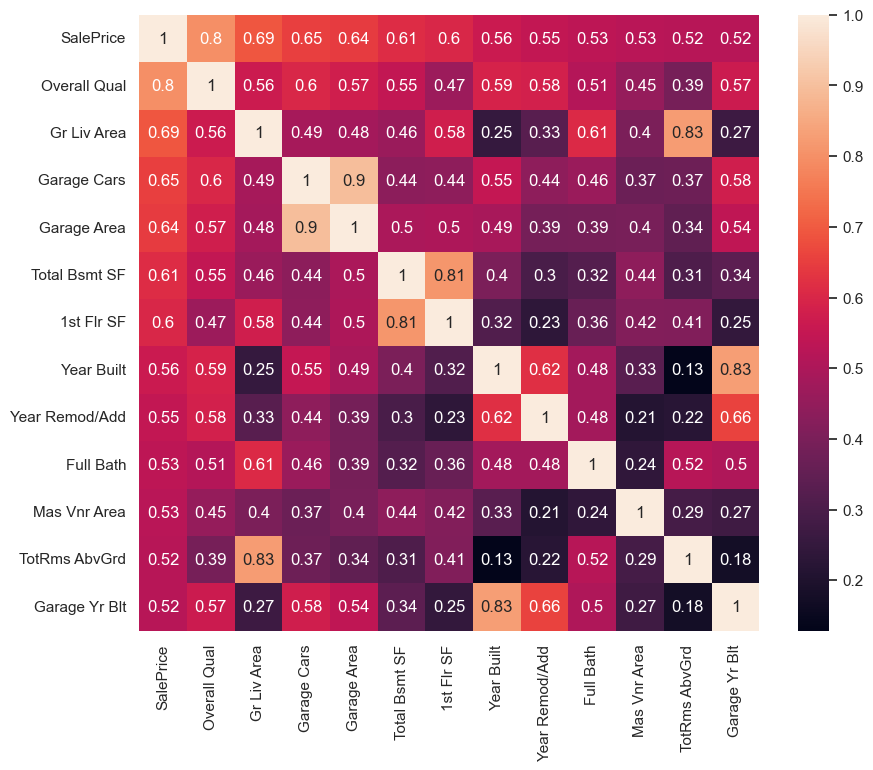

In [820]:
# Create a correlation matrix of the features I observed above
corr_matrix = train[['SalePrice', 'Overall Qual', 'Gr Liv Area', 'Garage Cars', 'Garage Area', 'Total Bsmt SF', '1st Flr SF', 'Year Built', 'Year Remod/Add', 'Full Bath', 'Mas Vnr Area', 'TotRms AbvGrd', 'Garage Yr Blt']].corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True)
plt.show()


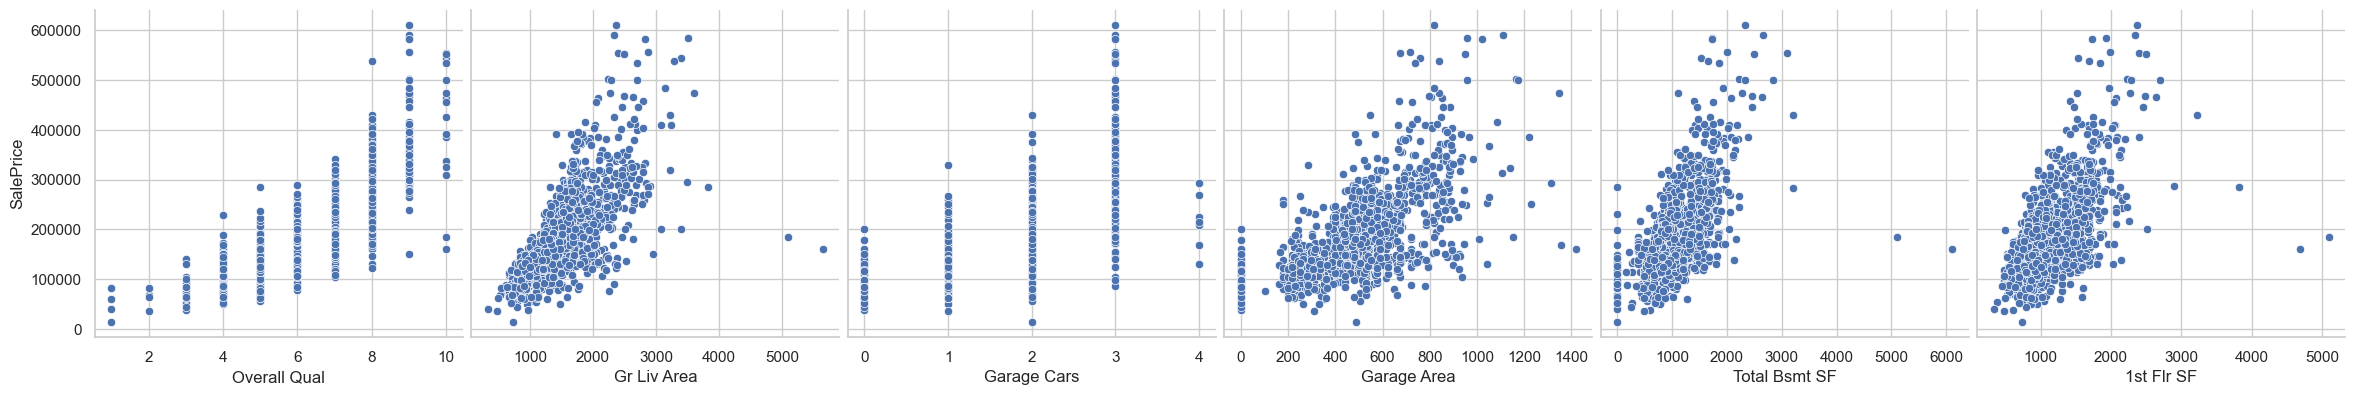

In [821]:
# Disclosure: I had originally ploted this graph like below, but didn't like it, so I used chat gpt to suggest how to make it better and got the adjustments I used. 
# sns.pairplot(train, x_vars=['Overall Qual', 'Gr Liv Area', 'Garage Cars', 'Garage Area', 'Total Bsmt SF', '1st Flr SF', 'Year Built', 'Year Remod/Add', 'Full Bath', 'Mas Vnr Area', 'TotRms AbvGrd', 'Garage Yr Blt'], y_vars='SalePrice')
# plt.show()

# Define the variables to be plotted
variables = ['Overall Qual', 'Gr Liv Area', 'Garage Cars', 'Garage Area', 
              'Total Bsmt SF', '1st Flr SF', 'Year Built', 'Year Remod/Add', 
              'Full Bath', 'Mas Vnr Area', 'TotRms AbvGrd', 'Garage Yr Blt']

# Create a pair plot with 2 tiers
sns.pairplot(train, x_vars=variables[:6], y_vars='SalePrice', height=4)
# Save the plot to a file
plt.savefig('sale_price_distribution.png')
plt.show()

# sns.pairplot(train, x_vars=variables[6:], y_vars='SalePrice', height=4)
# plt.show()

### Missing Values Train Data

In [822]:
# what columns have missing values and what percentage of the column is missing?
# I found this supper helpful code on: https://www.analyticsvidhya.com/blog/2022/07/step-by-step-exploratory-data-analysis-eda-using-python/
# and adapted it to my code
missing_values = train.isnull().sum()
missing_values_percentage = (train.isnull().sum() / len(train)) * 100
missing_values_table = pd.concat([missing_values, missing_values_percentage], axis=1)
missing_values_table.columns = ['Missing Values', 'Percentage of Missing Values']
missing_values_table[missing_values_table['Missing Values'] > 0]


,Missing Values,Percentage of Missing Values
Lot Frontage,253,16.449935
Alley,1427,92.782835
Mas Vnr Type,931,60.533160
Mas Vnr Area,18,1.170351
Bsmt Qual,40,2.600780
Bsmt Cond,40,2.600780
Bsmt Exposure,43,2.795839
BsmtFin Type 1,40,2.600780
BsmtFin SF 1,1,0.065020
BsmtFin Type 2,41,2.665800


### Missing Values Test Data

In [823]:
# what columns have missing values and what percentage of the column is missing?
# I found this supper helpful code on: https://www.analyticsvidhya.com/blog/2022/07/step-by-step-exploratory-data-analysis-eda-using-python/
# and adapted it to my code
missing_values = test.isnull().sum()
missing_values_percentage = (test.isnull().sum() / len(test)) * 100
missing_values_table = pd.concat([missing_values, missing_values_percentage], axis=1)
missing_values_table.columns = ['Missing Values', 'Percentage of Missing Values']
missing_values_table[missing_values_table['Missing Values'] > 0]


,Missing Values,Percentage of Missing Values
Lot Frontage,77,15.009747
Alley,484,94.346979
Mas Vnr Type,309,60.233918
Mas Vnr Area,4,0.779727
Bsmt Qual,15,2.923977
Bsmt Cond,15,2.923977
Bsmt Exposure,15,2.923977
BsmtFin Type 1,15,2.923977
BsmtFin Type 2,15,2.923977
Fireplace Qu,235,45.808967


### Colunn Treatment Train Data

In [824]:
# only keep highly correlated columns and drop the rest
train = train[['Unnamed: 0', 'SalePrice', 'Overall Qual', 'Gr Liv Area', 'Garage Cars', 'Total Bsmt SF', '1st Flr SF', 'Year Built', 'Year Remod/Add', 'Full Bath', 'Mas Vnr Area']]
train.head()

,Unnamed: 0,SalePrice,Overall Qual,Gr Liv Area,Garage Cars,Total Bsmt SF,1st Flr SF,Year Built,Year Remod/Add,Full Bath,Mas Vnr Area
0,532,167300,6,1587,2.0,1587.0,1587,1971,1971,2,302.0
1,415,219000,7,2267,2.0,1005.0,1262,1937,1980,1,0.0
2,273,129000,5,864,2.0,864.0,864,1950,2002,1,0.0
3,1460,328000,7,2260,2.0,1306.0,1306,1996,1997,2,0.0
4,250,290000,8,2501,3.0,1242.0,1251,1995,1995,2,466.0


In [825]:
# updated dtypes
train.dtypes

Unnamed: 0          int64
SalePrice           int64
Overall Qual        int64
Gr Liv Area         int64
Garage Cars       float64
Total Bsmt SF     float64
1st Flr SF          int64
Year Built          int64
Year Remod/Add      int64
Full Bath           int64
Mas Vnr Area      float64
dtype: object

In [826]:
# what columns have missing values and what percentage of the column is missing?
# I found this supper helpful code on: https://www.analyticsvidhya.com/blog/2022/07/step-by-step-exploratory-data-analysis-eda-using-python/
# and adapted it to my code
missing_values = train.isnull().sum()
missing_values_percentage = (train.isnull().sum() / len(train)) * 100
missing_values_table = pd.concat([missing_values, missing_values_percentage], axis=1)
missing_values_table.columns = ['Missing Values', 'Percentage of Missing Values']
missing_values_table[missing_values_table['Missing Values'] > 0]

,Missing Values,Percentage of Missing Values
Total Bsmt SF,1,0.065020
Mas Vnr Area,18,1.170351


In [827]:
# Simple Imputer & KNN imputer wouldn't work for me so I did it the hard way
train['Total Bsmt SF'].fillna(train['Total Bsmt SF'].median(), inplace=True)
train['Mas Vnr Area'].fillna(train['Mas Vnr Area'].median(), inplace=True)

In [828]:
train.isna().sum()

Unnamed: 0        0
SalePrice         0
Overall Qual      0
Gr Liv Area       0
Garage Cars       0
Total Bsmt SF     0
1st Flr SF        0
Year Built        0
Year Remod/Add    0
Full Bath         0
Mas Vnr Area      0
dtype: int64

In [829]:
# re-checking shape of the data
print(f"There are {train.shape[0]} rows and {train.shape[1]} columns.")

There are 1538 rows and 11 columns.


### Column Treatment Test Data

In [830]:
# only keep highly correlated columns and drop the rest
test = test[['Unnamed: 0', 'Overall Qual', 'Gr Liv Area', 'Garage Cars', 'Total Bsmt SF', '1st Flr SF', 'Year Built', 'Year Remod/Add', 'Full Bath', 'Mas Vnr Area']]

In [831]:
# Updated dtypes
test.dtypes

Unnamed: 0          int64
Overall Qual        int64
Gr Liv Area         int64
Garage Cars       float64
Total Bsmt SF     float64
1st Flr SF          int64
Year Built          int64
Year Remod/Add      int64
Full Bath           int64
Mas Vnr Area      float64
dtype: object

In [832]:
# re-checking shape of the data
print(f"There are {test.shape[0]} rows and {test.shape[1]} columns.")

There are 513 rows and 10 columns.


In [833]:
# what columns have missing values and what percentage of the column is missing?
# I found this supper helpful code on: https://www.analyticsvidhya.com/blog/2022/07/step-by-step-exploratory-data-analysis-eda-using-python/
# and adapted it to my code
missing_values = test.isnull().sum()
missing_values_percentage = (test.isnull().sum() / len(test)) * 100
missing_values_table = pd.concat([missing_values, missing_values_percentage], axis=1)
missing_values_table.columns = ['Missing Values', 'Percentage of Missing Values']
missing_values_table[missing_values_table['Missing Values'] > 0]

,Missing Values,Percentage of Missing Values
Garage Cars,1,0.194932
Mas Vnr Area,4,0.779727


In [834]:
# Simple Imputer & KNN imputer wouldn't work for me so I did it the hard way
test['Garage Cars'].fillna(test['Garage Cars'].median(), inplace=True)
test['Mas Vnr Area'].fillna(test['Mas Vnr Area'].median(), inplace=True)

In [835]:
test.isna().sum()

Unnamed: 0        0
Overall Qual      0
Gr Liv Area       0
Garage Cars       0
Total Bsmt SF     0
1st Flr SF        0
Year Built        0
Year Remod/Add    0
Full Bath         0
Mas Vnr Area      0
dtype: int64

## EDA

#### Sale Price and Overall Quality Analysis

As a reminder: Overall Quality Rates the overall material and finish of the house

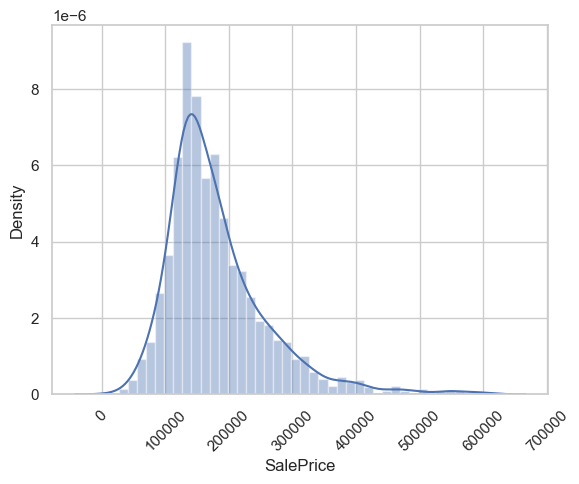

In [836]:
# what does the sale price dist look like?
sns.distplot(train['SalePrice'])
plt.xticks(rotation=45)
plt.show()

In [837]:
# what is the median house price
train['SalePrice'].median()

162250.0

Correlation Coefficient: 0.7958152617426837


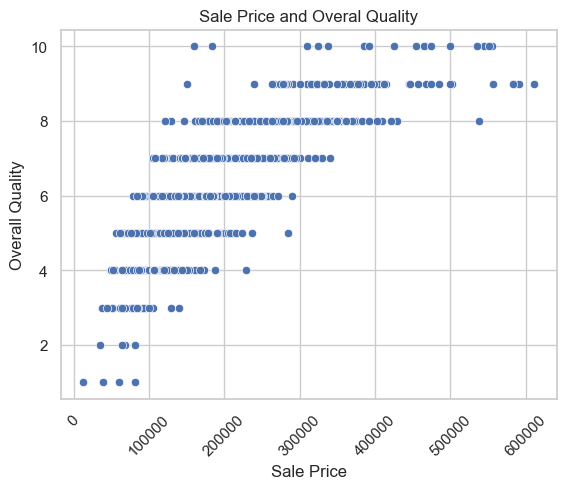

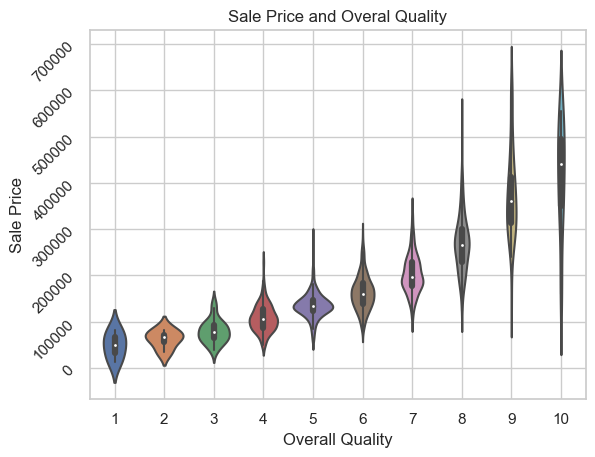

In [838]:
# overal quality WRT sales price

# Calculate the correlation coefficient
corr = train['Overall Qual'].corr(train['SalePrice'])
print('Correlation Coefficient:', corr)

#scatter plot
sns.scatterplot(data=train,x='SalePrice', y='Overall Qual')
# labels
plt.title('Sale Price and Overal Quality')
plt.xlabel('Sale Price')
plt.ylabel('Overall Quality')
plt.xticks(rotation=45)
plt.grid(True) 

# Save the plot to a file 
plt.savefig('sale_price_distribution.png')

plt.show()

# violin plot
sns.violinplot(data=train,x='Overall Qual', y='SalePrice')
# labels
plt.title('Sale Price and Overal Quality')
plt.xlabel('Overall Quality')
plt.ylabel('Sale Price')
plt.yticks(rotation=45)
plt.grid(True) 

# Save the plot
plt.savefig('sale_price_distribution.png')

plt.show()

**Observations**

The sale price of a home increases as the overall quality of the house increases, as you would expect, with the highest sale prices having quality ratings of 8, 9, and 10. To break 400K sale price, you need a quality rating of 8+.

My recommendation would be to only aquire homes with the highest overal quality in appearance and building materials.

#### Above Ground Living Area sq.ft. WRT Sales Price Analysis

Correlation Coefficient: 0.6915994732668918


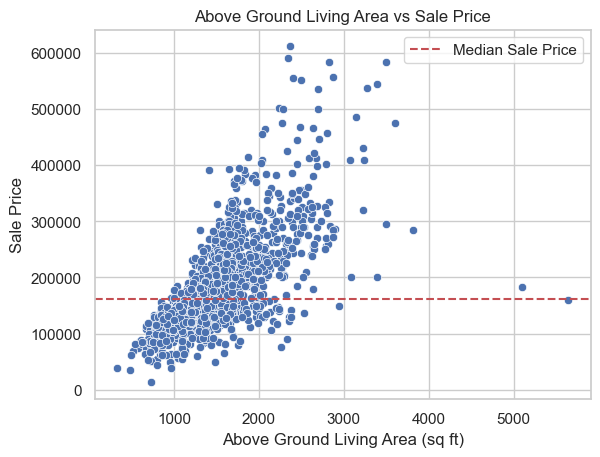

In [839]:
# Calculate the correlation coefficient
corr = train['Gr Liv Area'].corr(train['SalePrice'])
print('Correlation Coefficient:', corr)

# Scatter plot: above ground living area sq ft vs sales price
sns.scatterplot(x='Gr Liv Area', y='SalePrice', data=train)

# Calculate median sale price
median_price = train['SalePrice'].median()

# Add median line
plt.axhline(y=median_price, color='r', linestyle='--', label='Median Sale Price')

# Labeling and displaying the plot
plt.title('Above Ground Living Area vs Sale Price')
plt.xlabel('Above Ground Living Area (sq ft)')
plt.ylabel('Sale Price')
# Save the plot to a file 
plt.savefig('sale_price_distribution.png')
plt.legend()
plt.show()

In [840]:
# bin living area to make the comparision to sales price more visual
train['binned_lv_area'] = pd.cut(train['Gr Liv Area'],bins=[0,1000,1500,2000,3000, 6000],labels=['0-1k','1-1.5k','1.5-2k', '2-3k', '3k+'], right = False)
train['binned_lv_area'].value_counts()

binned_lv_area
1-1.5k    624
1.5-2k    475
0-1k      227
2-3k      197
3k+        15
Name: count, dtype: int64

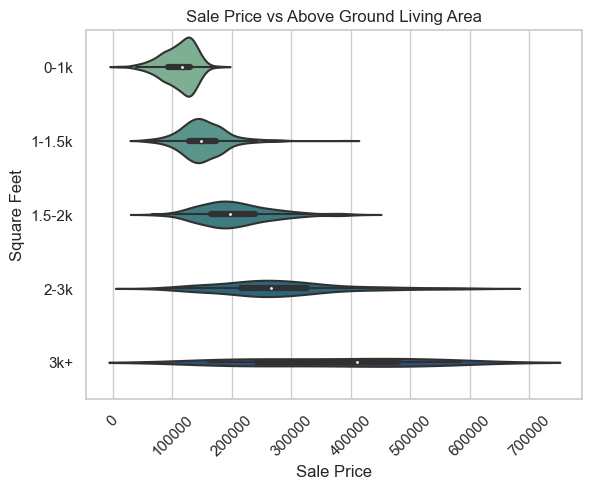

In [841]:
# Set the style of the plot
sns.set(style="whitegrid")

# Define the order for binned_lv_area in ascending order
order = sorted(train['binned_lv_area'].unique())

# Create the violin plot with the specified order
sns.violinplot(data=train, x='SalePrice', y='binned_lv_area', palette='crest', order=order)

# Add title and labels
plt.title('Sale Price vs Above Ground Living Area')
plt.xlabel('Sale Price')
plt.ylabel('Square Feet')

# Rotate the x-axis labels
plt.xticks(rotation=45)

# Save the plot to a file 
plt.savefig('sale_price_distribution.png')

# Show the plot
plt.show()

In [842]:
# what is the average Gr Liv Area
print(f"The average Gr Liv Area is {train['Gr Liv Area'].median()}")

The average Gr Liv Area is 1441.0


In [843]:
# what is the average sale prie per binned square feet
train.groupby('binned_lv_area')['SalePrice'].mean().reset_index()

,binned_lv_area,SalePrice
0,0-1k,110779.511013
1,1-1.5k,151448.174679
2,1.5-2k,206511.818947
3,2-3k,280242.883249
4,3k+,368118.266667


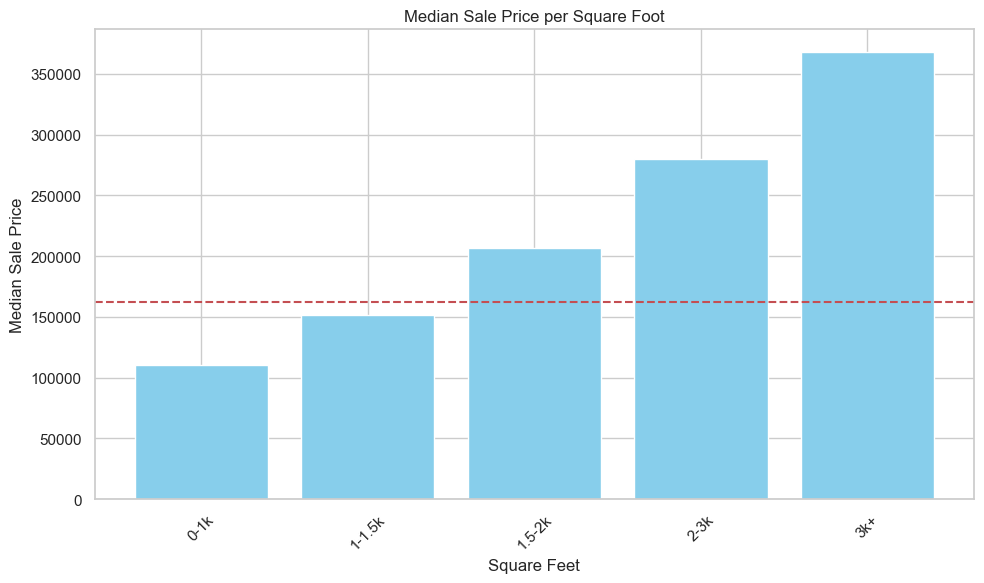

In [844]:
# Convert 'binned_lv_area' column to string type
train['binned_lv_area'] = train['binned_lv_area'].astype(str)

# Calculate average sale price per binned square feet
avg_sale_price = train.groupby('binned_lv_area')['SalePrice'].mean().reset_index()

# Sort DataFrame by average sale price in ascending order
avg_sale_price_sorted = avg_sale_price.sort_values(by='SalePrice')

# Calculate median sale price
median_price = train['SalePrice'].median()


# Plotting the average sale price per binned square feet
plt.figure(figsize=(10, 6))
# Add median line
plt.axhline(y=median_price, color='r', linestyle='--', label='Median Sale Price')

plt.bar(avg_sale_price_sorted['binned_lv_area'], avg_sale_price_sorted['SalePrice'], color='skyblue')
# labels
plt.xlabel('Square Feet')
plt.ylabel('Median Sale Price')
plt.title('Median Sale Price per Square Foot')
plt.xticks(rotation=45) 

# Save the plot to a file 
plt.savefig('sale_price_distribution.png')
plt.tight_layout()

plt.show()

In [845]:
train.columns

Index(['Unnamed: 0', 'SalePrice', 'Overall Qual', 'Gr Liv Area', 'Garage Cars',
       'Total Bsmt SF', '1st Flr SF', 'Year Built', 'Year Remod/Add',
       'Full Bath', 'Mas Vnr Area', 'binned_lv_area'],
      dtype='object')

In [846]:
# lets double check that it's gone
train.columns

Index(['Unnamed: 0', 'SalePrice', 'Overall Qual', 'Gr Liv Area', 'Garage Cars',
       'Total Bsmt SF', '1st Flr SF', 'Year Built', 'Year Remod/Add',
       'Full Bath', 'Mas Vnr Area', 'binned_lv_area'],
      dtype='object')

**Observations**

As the above ground (grade) square footage increases, so to does the sale price with highest home values above 3K square ft. There is an approx 70k value increase from 2k - 3k square feet and 100k from 3k+ square feet. 

You will notice a few extreme values in both living area size and sale price, as this data is about real estate and, though the numbers are outliers, they are not outside the realm of real house sizes and values. Therefore, they are important to this datasets ability to predict values for large homes and are not being dropped. 

**Recommendation**
 
The median sale price of a home is $162250 and the median home size is 1440 sq. ft. As the goal is to diversify the portfolio to protect against loss, I would recommend purchasing homes with square footage of 1400 and up. 

#### Garage Car Capacity WRT Sales Price Analysis

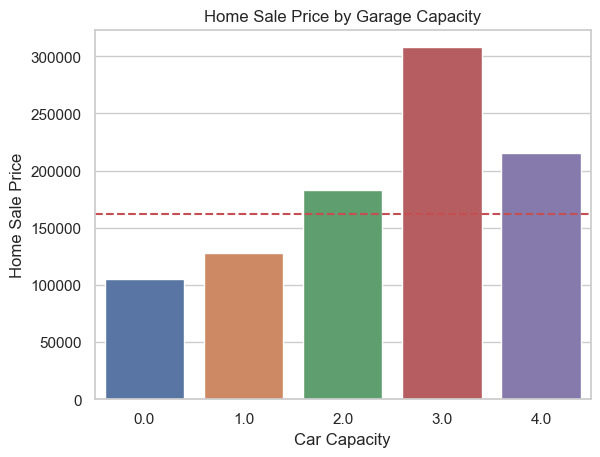

Correlation Coefficient: 0.6494641578790682


In [847]:
# Create a bar plot
sns.barplot(data=train, x='Garage Cars', y='SalePrice', ci=None)  # ci=None removes confidence intervals

# Add median line
plt.axhline(y=median_price, color='r', linestyle='--', label='Median Sale Price')
plt.title('Home Sale Price by Garage Capacity')
plt.xlabel('Car Capacity')
plt.ylabel('Home Sale Price')

# Save the plot to a file 
plt.savefig('sale_price_distribution.png')
plt.show()

# Calculate the correlation coefficient
corr = train['Garage Cars'].corr(train['SalePrice'])
print('Correlation Coefficient:', corr)

In [848]:
# prompt: group Garage Cars and sale price and find the average sale price for each value in Garage cars
carCap_saleAvg = train.groupby('Garage Cars')['SalePrice'].median()
carCap_saleAvg

Garage Cars
0.0     99250.0
1.0    128000.0
2.0    177000.0
3.0    293038.5
4.0    215000.0
Name: SalePrice, dtype: float64

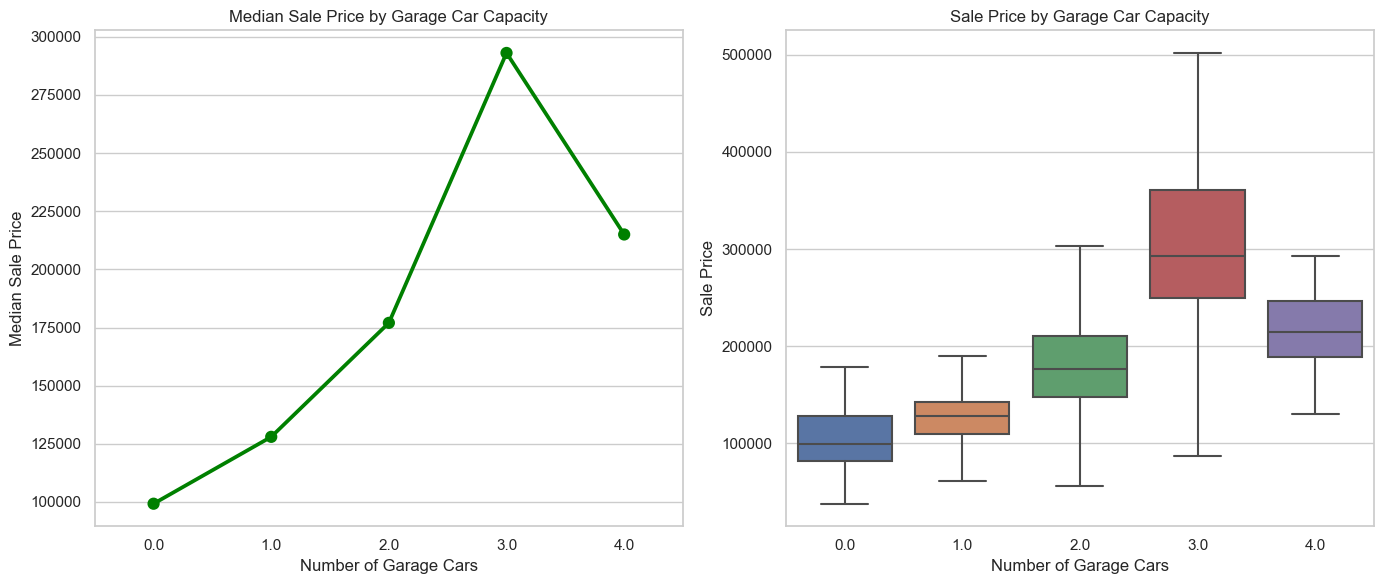

In [849]:
# Create subplots with side-by-side arrangement
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Point Plot
sns.pointplot(x=carCap_saleAvg.index, y=carCap_saleAvg.values, color='green', ax=axes[0])
axes[0].set_xlabel('Number of Garage Cars')
axes[0].set_ylabel('Median Sale Price')
axes[0].set_title('Median Sale Price by Garage Car Capacity')

# Box Plot without outliers
sns.boxplot(x=train['Garage Cars'], y=train['SalePrice'], showfliers=False, ax=axes[1])
axes[1].set_xlabel('Number of Garage Cars')
axes[1].set_ylabel('Sale Price')
axes[1].set_title('Sale Price by Garage Car Capacity')

# Save the plot to a file 
plt.savefig('sale_price_distribution.png')

# Adjust layout
plt.tight_layout()

# Show the subplots
plt.show()

In [850]:
# How many values are there in each car value
train['Garage Cars'].value_counts(normalize=True)

Garage Cars
2.0    0.548114
1.0    0.257477
3.0    0.132640
0.0    0.057217
4.0    0.004551
Name: proportion, dtype: float64

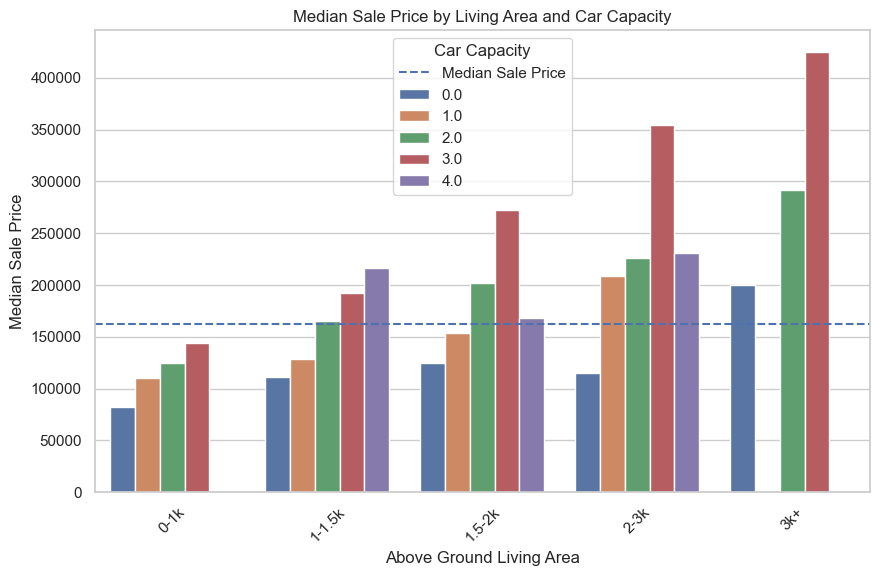

In [851]:
# Let's see how above ground living space and car capacity affect sale price
mean_sale_price = train.groupby(['binned_lv_area', 'Garage Cars'])['SalePrice'].mean().reset_index()

# Create a clustered bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=mean_sale_price, x='binned_lv_area', y='SalePrice', hue='Garage Cars')

# Add median line
plt.axhline(y=median_price, color='b', linestyle='--', label='Median Sale Price')

# Add labels
plt.xlabel('Above Ground Living Area')
plt.ylabel('Median Sale Price')
plt.title('Median Sale Price by Living Area and Car Capacity')
plt.xticks(rotation=45)
plt.legend(title='Car Capacity')
# Save the plot to a file 
plt.savefig('sale_price_distribution.png')
plt.show()

**Observations:**

Sixty eight percent of all homes in this dataset have a 2 car garage or higher. The median home sale price in that range is above the 175k - 295K, which is higher than the mean sale price of the dataset. This tells us that homes with at least a 2 car garage or more have higher sale values. Homes with 1 or less car spaces fall below the median sale price for all homes under 2k square ft.

**Recommendation:**

I would recommend aquiring residential homes in the Iowa that have a 2 - 3 car garage space at a minimum.

#### Total Basement Sq. Ft WRT Sale Price Analysis

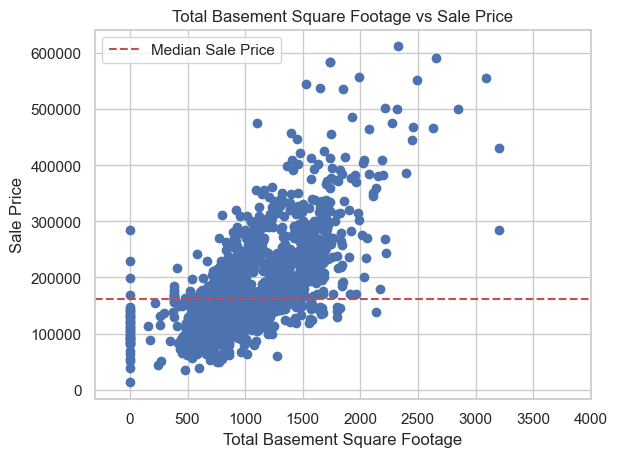

Correlation Coefficient: 0.6131374179506315


In [852]:
# What does our basement sp ft vs sale price look like
# Create a scatter plot of Total Bsmt SF vs SalePrice
plt.scatter(train['Total Bsmt SF'], train['SalePrice'])
# Add median line
plt.axhline(y=median_price, color='r', linestyle='--', label='Median Sale Price')
# Zoom the image in
plt.xlim(xmax= 4000)
plt.xlabel('Total Basement Square Footage')
plt.ylabel('Sale Price')
plt.title('Total Basement Square Footage vs Sale Price')
plt.legend()
# Save the plot to a file 
plt.savefig('sale_price_distribution.png')
plt.show()

# Calculate the correlation coefficient
corr = train['Total Bsmt SF'].corr(train['SalePrice'])
print('Correlation Coefficient:', corr)

**Observations:**

The total basement square footage tells us pretty much the same thing as the above ground square feet. Most homes without a basement fall below the median home sale price. Homes with robust sale prices have basements 1k sq. ft or bigger.

**Recommendations:**
To fortify holdings against loss, I would recommend adding residential properties with basements to the portfolio and avoid those without.

#### Year Build WRT Sale Price Analysis

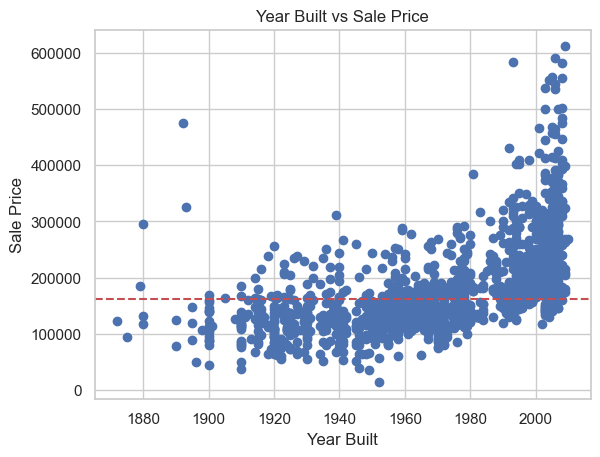

Correlation Coefficient: 0.5611158963216639


In [853]:
# Create a scatter plot of Year Built vs SalePrice
plt.scatter(train['Year Built'], train['SalePrice'])

# Add median line
plt.axhline(y=median_price, color='r', linestyle='--', label='Median Sale Price')

# Labels
plt.xlabel('Year Built')
plt.ylabel('Sale Price')
plt.title('Year Built vs Sale Price')
plt.show()

# Calculate the correlation coefficient
corr = train['Year Built'].corr(train['SalePrice'])
print('Correlation Coefficient:', corr)

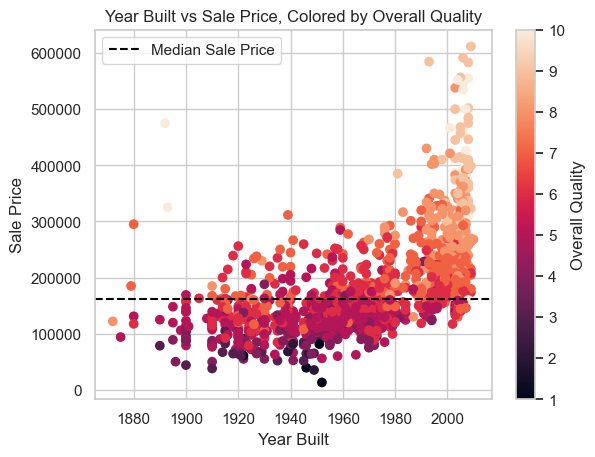

In [854]:
# Create a scatter plot of Year Built vs SalePrice, colored by Overall Qual
plt.scatter(train['Year Built'], train['SalePrice'], c=train['Overall Qual'])

# Add median line
plt.axhline(y=median_price, color='black', linestyle='--', label='Median Sale Price')

plt.xlabel('Year Built')
plt.ylabel('Sale Price')
plt.title('Year Built vs Sale Price, Colored by Overall Quality')
plt.colorbar(label='Overall Quality')
plt.legend()
plt.show()

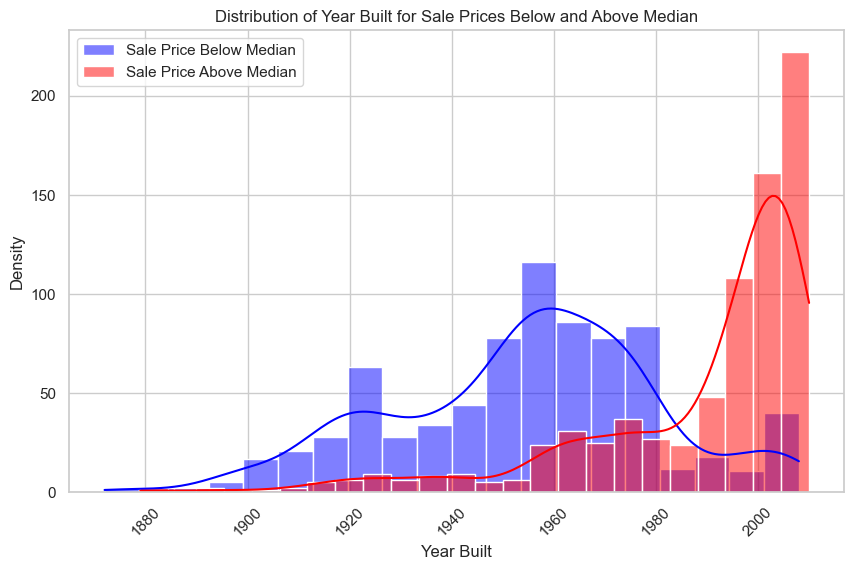

In [855]:
# What is the distribution of year built below the median home sale price and above?
# Calculate the median sale price
median_sale_price = train['SalePrice'].median()

# Split the dataset into two groups based on sale price
below_median_price = train[train['SalePrice'] < median_sale_price]
above_median_price = train[train['SalePrice'] >= median_sale_price]

# Plot grouped histograms
plt.figure(figsize=(10, 6))
sns.histplot(below_median_price['Year Built'], color='blue', label='Sale Price Below Median', kde=True)
sns.histplot(above_median_price['Year Built'], color='red', label='Sale Price Above Median', kde=True)
plt.xlabel('Year Built')
plt.ylabel('Density')
plt.title('Distribution of Year Built for Sale Prices Below and Above Median')
plt.legend()
plt.xticks(rotation=45)
plt.show()

**Observations:**

It's clear from graphs and distribution of the Year homes were built plotted against median sale prices that home more than 20 years hold are far more likely to be sell for less than the median sale price. Even older homes with higher overall quality didn't have as high of sale prices and homes built in the last 20 years.

**Recommendations**

I would recommend adding residential real estate to the portfolio that was built in 2000 or newer.

#### Full Bath WRT Sale Price Analysis

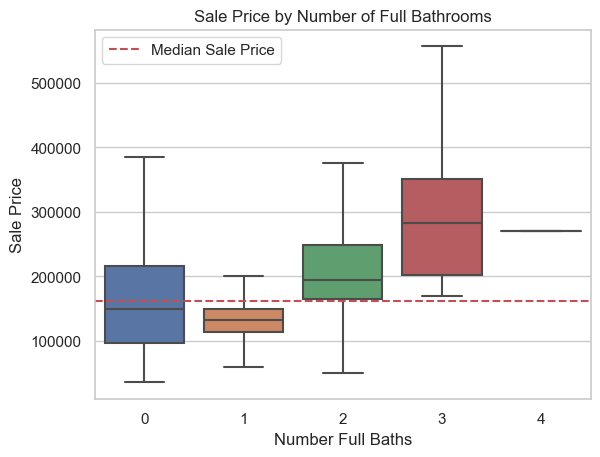

Correlation Coefficient: 0.5346294700113026


In [856]:
# How does the number of baths affect the sale price?
sns.boxplot(data=train, x='Full Bath', y='SalePrice', showfliers=False)
# Add median line
plt.axhline(y=median_price, color='r', linestyle='--', label='Median Sale Price')

# Add titles
plt.title('Sale Price by Number of Full Bathrooms')
plt.xlabel('Number Full Baths')
plt.ylabel('Sale Price')
plt.legend()
# Save the plot to a file 
plt.savefig('sale_price_distribution.png')
plt.show()

# Calculate the correlation coefficient
corr = train['Full Bath'].corr(train['SalePrice'])
print('Correlation Coefficient:', corr)

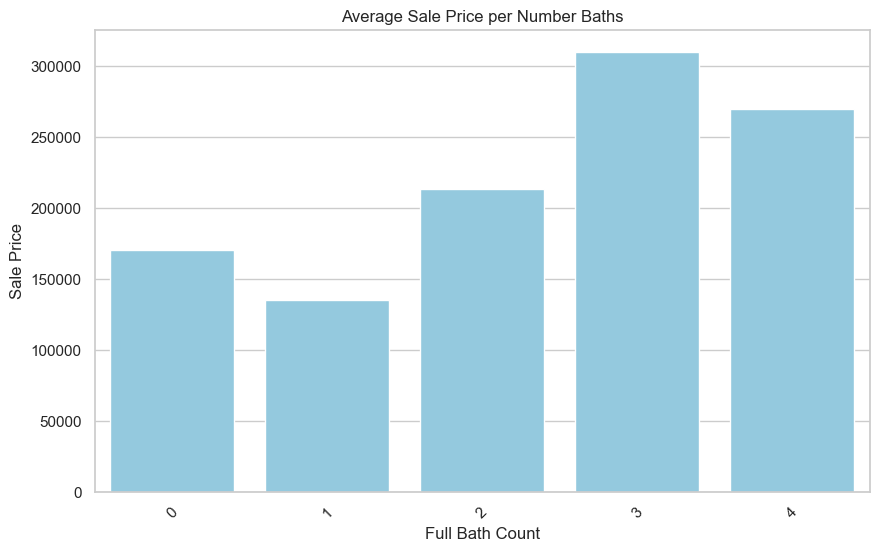

In [857]:
# Calculate the average sale price for each value of 'Full Bath'
avg_sale_price_per_bath = train.groupby('Full Bath')['SalePrice'].mean().reset_index()

# Plot the average sale price for each 'Full Bath' value
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_sale_price_per_bath, x='Full Bath', y='SalePrice', color='skyblue')
plt.xlabel('Full Bath Count')
plt.ylabel('Sale Price')
plt.title('Average Sale Price per Number Baths')
plt.xticks(rotation=45)
# Save the plot to a file 
plt.savefig('sale_price_distribution.png')
plt.show()

**Observation**
Residential properties with at least 2 or more full baths beat median residential home sale price by between $50k-150K. Whereas, homes with 1 or fewer full baths sit at or below the median sale price. 

**Recommendation:**
I recommend adding residential properties with 2 or more full baths.

In [858]:
# I don't want my bins creating problems for my model so I'm dropping it.
train = train.drop(columns=['binned_lv_area'])

In [859]:
train.columns

Index(['Unnamed: 0', 'SalePrice', 'Overall Qual', 'Gr Liv Area', 'Garage Cars',
       'Total Bsmt SF', '1st Flr SF', 'Year Built', 'Year Remod/Add',
       'Full Bath', 'Mas Vnr Area'],
      dtype='object')

#### Conclusion and Recommendations

**Conclusions**

After thorough evaluation of all the correlating features in the supplied Ames Iowa dataset, I was able to infer from this sample data that the top 6 features that contribute most to the sale price of a residential property are:

1) Overall Home Quality. This refers to the materials used and finishes on the home. The better quality the materials used in the home, the more the home outperforms the median sale price.

2) Above Ground Living Area. Homes with 2k-3k+ square feet outperform median home sales be $70k-170k.

3) Garage Car Capacity. The median sale price for residential units with 2 or more car space capacity  is 175k - 295K, which is beats the median sale price of the dataset.

4) Total Basement Square Feet. Most homes without a basement fall below the median home sale price. Residential units with robust sale prices, beating the median value by $2k - 100K+ have basements 1k sq. ft or bigger.

5) Year Built. It's clear from graphs and distribution of Year Built versus sale price that homes more than 20 years are far more likely to be sell for less than the median sale price. Even older homes with higher overall quality didn't have as high of sale prices and homes built in the last 20 years.

6) Full Baths. Residential properties with at least 2 or more full baths beat median residential home sale price by between $50k-150K. Whereas, homes with 1 or fewer full baths sit at or below the median sale price.

**Recommendations**
With the goal of diversifying Legacy Landmark LLC's portfolio in order to mitigate further losses in the volatile commercial real estate market by expanding into more profitable residential real estate markets, my recommendations are to add residential units that were built after 2000 and have high quality materials throughout the home. I also recommend minimum above grade square footage of 2k plus units with basements. You should also consider homes with at least a 2 car capacity and at least 2 full baths.  

**Further Research**
Now that we've narrowed down the features that add the most value to a residential unit. I recommend analyzing markets within the state and throughout the country

### Train/Val Split Train Data

In [860]:
# Set X & y
X= train.drop('SalePrice', axis=1)
y= train['SalePrice']

In [861]:
# Splitting data into training, validation and test set:
# first we split data into 2 parts, say temporary and test
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.3, random_state=1)

In [862]:
print(f"Shape of original data frame: {train.shape}")
print(" ")
print(f"Shape of X train: {X_train.shape}")
print(f"Shape of y train: {y_train.shape}")
print(" ")
print(f"Shape of X test: {X_val.shape}")
print(f"Shape of y test: {y_val.shape}")

Shape of original data frame: (1538, 11)
 
Shape of X train: (1076, 10)
Shape of y train: (1076,)
 
Shape of X test: (462, 10)
Shape of y test: (462,)


### Data Scaling Test Data

In [863]:
# scale data

# create an instance of standardscaler
scaler = StandardScaler()

# Fit and transform training & validation data
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

In [864]:
# scale test.csv
scaler = StandardScaler()
test = scaler.fit_transform(test)

#### Model Performance Function

In [865]:
# this code came from a notebook I worked on at UnivTex
# here is the notebook: https://drive.google.com/file/d/1iFIqVEe368N1OSUZn-xwfClxm3DFT8CZ/view?usp=sharing
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    mse = mean_squared_error(target, pred, squared=False)
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "MSE": mse,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

## Model Baseline and Tunned

#### Baseline

In [866]:
# baseline to compare to tunned models
baseline = train['SalePrice'].mean()
baseline

181061.9934980494

#### Model 1

In [867]:
# linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [868]:
# model 1 train performance
lr_model_train_perf= model_performance_regression(lr, X_train, y_train)
lr_model_train_perf

,RMSE,MAE,MSE,R-squared,Adj. R-squared,MAPE
0,37492.265667,24217.807405,37492.265667,0.767657,0.765475,14.5037


In [869]:
# model 1 validation performance
lr_model_val_perf= model_performance_regression(lr, X_val, y_val)
lr_model_val_perf

,RMSE,MAE,MSE,R-squared,Adj. R-squared,MAPE
0,37565.421022,24975.559605,37565.421022,0.796658,0.792149,14.401933


#### Model 2

In [870]:
# linear regression model with cross validation
lr_cv = LinearRegression()

cv_scores = cross_val_score(lr_cv, X_train, y_train, cv=10)
cv_scores

array([0.08579378, 0.78632703, 0.8356507 , 0.83894621, 0.85447363,
       0.80249148, 0.80981651, 0.71846443, 0.74665598, 0.79542703])

In [871]:
lr_cv.fit(X_train, y_train)

LinearRegression()

In [872]:
# Model 2 train performance
lr_cv_model_train_perf= model_performance_regression(lr_cv, X_train, y_train)
lr_cv_model_train_perf

,RMSE,MAE,MSE,R-squared,Adj. R-squared,MAPE
0,37492.265667,24217.807405,37492.265667,0.767657,0.765475,14.5037


In [873]:
# Model 2 validation performance
print("Val Performance\n")
lr_cv_model_val_perf = model_performance_regression(lr_cv, X_val, y_val)
lr_cv_model_val_perf

Val Performance



,RMSE,MAE,MSE,R-squared,Adj. R-squared,MAPE
0,37565.421022,24975.559605,37565.421022,0.796658,0.792149,14.401933


#### Model 3

In [874]:
# Lasso model with GridSearchCV
lgrid = Lasso()
lgrid.fit(X_train, y_train)

Lasso()

In [875]:
# fix the parameter grid for grid search
params = {'alpha': [0.001, 0.01, 0.1, 1.0, 10.0]}

grid_search = GridSearchCV(estimator=lgrid, param_grid=params, cv=10)

# fit GridSearchCV to the data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1.0, 10.0]})

In [876]:
# get the best parameters
grid_search.best_params_

{'alpha': 10.0}

In [877]:
# Get the best estimator from the gridsearch
best_model= grid_search.best_estimator_
test_score = best_model.score(X_val, y_val)
test_score

0.7965852814400738

In [878]:
# model 3 train performance
lgrid_train_perf= model_performance_regression(lgrid, X_train, y_train)
lgrid_train_perf

,RMSE,MAE,MSE,R-squared,Adj. R-squared,MAPE
0,37492.265799,24217.81334,37492.265799,0.767657,0.765475,14.503575


In [879]:
# model 3 validation performance
lgrid_val_perf= model_performance_regression(lgrid, X_val, y_val)
lgrid_val_perf

,RMSE,MAE,MSE,R-squared,Adj. R-squared,MAPE
0,37566.125745,24975.939252,37566.125745,0.796651,0.792142,14.402067


### Model 4

In [880]:
# Ridge
ridge = Ridge()
param_grid = {'alpha': [0.1, 1.0, 10.0]}
cv = 5

rcv = GridSearchCV(ridge, param_grid, cv=cv, scoring= "neg_mean_squared_error")

In [881]:
rcv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(), param_grid={'alpha': [0.1, 1.0, 10.0]},
             scoring='neg_mean_squared_error')

In [882]:
best_alpha = grid_search.best_params_['alpha']
best_alpha

10.0

In [883]:
# model 4 train performance
ridge_train_perf= model_performance_regression(rcv, X_train, y_train)
ridge_train_perf

,RMSE,MAE,MSE,R-squared,Adj. R-squared,MAPE
0,37494.096434,24178.795115,37494.096434,0.767634,0.765452,14.456408


In [884]:
# model 4 test performance
ridge_val_perf= model_performance_regression(rcv, X_val, y_val)
ridge_val_perf

,RMSE,MAE,MSE,R-squared,Adj. R-squared,MAPE
0,37607.88117,24964.818755,37607.88117,0.796198,0.791679,14.372015


### Model 5

In [885]:
# Model 5
ridge_cv = RidgeCV(alphas=[10.0], cv=10, scoring='neg_mean_squared_error')
ridge_cv.fit(X_train, y_train)

RidgeCV(alphas=[10.0], cv=10, scoring='neg_mean_squared_error')

In [886]:
ridge_cv.alpha_

10.0

In [887]:
# model 5 train performance
rcv_train_perf= model_performance_regression(ridge_cv, X_train, y_train)
rcv_train_perf

,RMSE,MAE,MSE,R-squared,Adj. R-squared,MAPE
0,37494.096434,24178.795115,37494.096434,0.767634,0.765452,14.456408


In [888]:
# model 5 val performance
rcv_val_perf= model_performance_regression(ridge_cv, X_val, y_val)
rcv_val_perf

,RMSE,MAE,MSE,R-squared,Adj. R-squared,MAPE
0,37607.88117,24964.818755,37607.88117,0.796198,0.791679,14.372015


### Model 6



In [889]:
# DISCLOSURE: As I was search for parameters for gridsearchCV to try to get a better score and found this code
# and thought I would be fun to test this model as well!
# I found the code on https://python.plainenglish.io/comparing-linear-regression-and-random-forest-regression-using-python-23cc1b8c5795

# Random Forest Regression
rf_reg = RandomForestRegressor(n_estimators=100, random_state=0)
rf_reg.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [890]:
# model 6 train performance
rf_train_perf= model_performance_regression(rf_reg, X_train, y_train)
rf_train_perf

,RMSE,MAE,MSE,R-squared,Adj. R-squared,MAPE
0,11807.036985,7199.069154,11807.036985,0.976958,0.976741,4.494572


In [891]:
# model 6 val performance
rf_val_perf= model_performance_regression(rf_reg, X_val, y_val)
rf_val_perf

,RMSE,MAE,MSE,R-squared,Adj. R-squared,MAPE
0,28106.092826,18744.619481,28106.092826,0.886171,0.883648,10.798124


### Kaggle Submission Prepwork

In [892]:
# I fit the model to the X_train, y_train
rf_reg.fit(X_train, y_train)
# then predict on the test.csv file
df = pd.DataFrame(rf_reg.predict(test))
df.columns = ["SalePrice"]
df.to_csv("datasets/1.csv")

In [893]:
df

,SalePrice
0,136775.45
1,208302.00
2,299137.31
3,144372.75
4,207171.90
...,...
508,147682.82
509,102864.54
510,147910.67
511,130250.14


In [894]:
# This has already been run for the kaggle submission and doesn't need to be done again
# subtest= pd.read_csv('/content/drive/MyDrive/DSML/GA_DS/Projects/project_2/datasets/test.csv')

In [895]:
# subtest.head()

In [896]:
# This has already been run and doesn't need to happen again
# pd.concat([subtest['Unnamed: 0'], df['SalePrice']], axis=1).set_index('Unnamed: 0').to_csv('/content/drive/MyDrive/DSML/GA_DS/Projects/project_2/datasets/tanyassubmission.csv')

In [897]:
# submission.to_csv('/content/drive/MyDrive/DSML/GA_DS/Projects/project_2/datasets/tanyassubmission.csv')